<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [180]:
# import piplite
# await piplite.install(['seaborn'])

In [181]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [182]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-08-22 19:08:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2022-08-22 19:08:44 (40.0 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [183]:
df = pd.read_csv('loan_train.csv')
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   
3           4             4     PAIDOFF       1000     30       9/9/2016   
4           6             6     PAIDOFF       1000     30       9/9/2016   

    due_date  age             education  Gender  
0  10/7/2016   45  High School or Below    male  
1  10/7/2016   33              Bechalor  female  
2  9/22/2016   27               college    male  
3  10/8/2016   28               college  female  
4  10/8/2016   29               college    male

In [184]:
df.shape

(346, 10)

### Convert to date time object


In [185]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  
0 2016-10-07   45  High School or Below    male  
1 2016-10-07   33              Bechalor  female  
2 2016-09-22   27               college    male  
3 2016-10-08   28               college  female  
4 2016-10-08   29               college    male

# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [186]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [187]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y
# import piplite
# await piplite.install(['seaborn'])

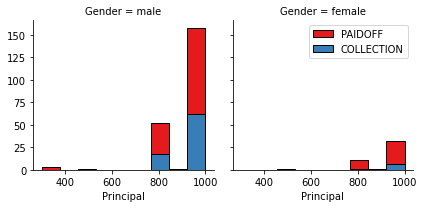

In [188]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

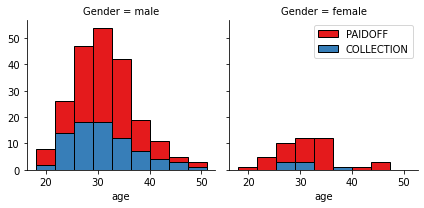

In [189]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


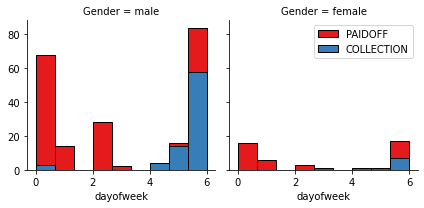

In [190]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [191]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   45  High School or Below    male          3        0  
1 2016-10-07   33              Bechalor  female          3        0  
2 2016-09-22   27               college    male          3        0  
3 2016-10-08   28               college  female          4        1  
4 2016-10-08   29               college    male          4        1

## Convert Categorical features to numerical values


Let's look at gender:


In [192]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [193]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30     2016-09-08   
1           2             2     PAIDOFF       1000     30     2016-09-08   
2           3             3     PAIDOFF       1000     15     2016-09-08   
3           4             4     PAIDOFF       1000     30     2016-09-09   
4           6             6     PAIDOFF       1000     30     2016-09-09   

    due_date  age             education  Gender  dayofweek  weekend  
0 2016-10-07   45  High School or Below       0          3        0  
1 2016-10-07   33              Bechalor       1          3        0  
2 2016-09-22   27               college       0          3        0  
3 2016-10-08   28               college       1          4        1  
4 2016-10-08   29               college       0          4        1

## One Hot Encoding

#### How about education?


In [194]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [195]:
df[['Principal','terms','age','Gender','education']].head()

Principal  terms  age  Gender             education
0       1000     30   45       0  High School or Below
1       1000     30   33       1              Bechalor
2       1000     15   27       0               college
3       1000     30   28       1               college
4       1000     30   29       0               college

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [196]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

### Feature Selection


Let's define feature sets, X:


In [197]:
X = Feature
X[0:5]

Principal  terms  age  Gender  weekend  Bechalor  High School or Below  \
0       1000     30   45       0        0         0                     1   
1       1000     30   33       1        0         1                     0   
2       1000     15   27       0        0         0                     0   
3       1000     30   28       1        1         0                     0   
4       1000     30   29       0        1         0                     0   

   college  
0        0  
1        0  
2        1  
3        1  
4        1

What are our lables?


In [198]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [199]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [200]:
y.shape

(346,)

In [201]:
X.shape

(346, 8)

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [202]:
# Import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# i had to use this, because i was running an old version od sklearn from skills network Labs
from sklearn.metrics import jaccard_similarity_score 
# from sklearn.metrics import jaccard_score

# Train Test Split 
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set knn:', X_train_knn.shape,  y_train_knn.shape)
print ('Test set knn:', X_test_knn.shape,  y_test_knn.shape)


Train set knn: (276, 8) (276,)
Test set knn: (70, 8) (70,)


In [203]:
# Training
# starting a model w/ k=4
k = 7 # the best k for my case
#Train Model 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_knn,y_train_knn)
neigh

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [204]:
# Predicting
yhat_knn = neigh.predict(X_test_knn)

# Pre-Evaluation train vs test plitted data
print("Train set knn Accuracy:", metrics.accuracy_score(y_train_knn, neigh.predict(X_train_knn)))
# print("Test set knn Accuracy: ", metrics.accuracy_score(y_test_knn, yhat_knn))
print("Avg F1-score - knn : %.4f" % f1_score(y_test_knn, yhat_knn, average='weighted'))
print("Jaccard score - knn : %.4f" % jaccard_similarity_score(y_test_knn, yhat_knn))
yhat_knn[0:5]

Train set knn Accuracy: 0.8079710144927537
Avg F1-score - knn : 0.7767
Jaccard score - knn : 0.7857


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < Loose

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Decision Tree


In [205]:
# Import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Train Test Split
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split( X, y, test_size=0.2, random_state=4) #20% of testset => accur~64(f1) & 61% jaccard 
# X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split( X, y, test_size=0.1, random_state=4) #10 % of testset=> accur~70%(F1 better) => underfitting
# X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split( X, y, test_size=0.30, random_state=4) #30 % of testset=> accur~74% (jaccard better) => overfitting

print ('Train set ds:', X_train_ds.shape,  y_train_ds.shape)
print ('Test set ds:', X_test_ds.shape,  y_test_ds.shape)

Train set ds: (276, 8) (276,)
Test set ds: (70, 8) (70,)


In [206]:
# Training

#Train Model
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
# default parameters
loanTree 
# fitting 
loanTree.fit(X_train_ds,y_train_ds)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [207]:
#Predicting
predTree = loanTree.predict(X_test_ds)

# Evaluation 
# from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test_ds, predTree))
print("Jaccard score - DecisionTrees: %.4f" % jaccard_similarity_score(y_test_ds, predTree))
print("Avg F1-score - DecisionTrees: %.4f" % f1_score(y_test_ds, predTree, average='weighted'))
predTree[:5]
# y_test_ds[:5]

DecisionTrees's Accuracy:  0.6142857142857143
Jaccard score - DecisionTrees: 0.6143
Avg F1-score - DecisionTrees: 0.6446


array(['COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Support Vector Machine


In [208]:
# Train Test Split

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set svm:', X_train_svm.shape,  y_train_svm.shape)
print ('Test set svm:', X_test_svm.shape,  y_test_svm.shape)

Train set svm: (276, 8) (276,)
Test set svm: (70, 8) (70,)


In [209]:
# Train
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_svm, y_train_svm) 

# Predicting 
yhat_svm = clf.predict(X_test_svm)
yhat_svm [0:5]

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [210]:
# Evaluation f1_score & jaccard_score
# i had to use this, because i was running an old version od sklearn from skills network Labs
from sklearn.metrics import jaccard_similarity_score 
# from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


print("Avg F1-score: %.4f" % f1_score(y_test_svm, yhat_svm, average='weighted'))
# print("Jaccard score: %.4f" % jaccard_score(y_test_svm, yhat_svm, pos_label=2))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test_svm, yhat_svm))
y_test_svm.size

Avg F1-score: 0.7276
Jaccard score: 0.7429


70

# Logistic Regression


In [211]:
# Train Test Split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set lr:', X_train_lr.shape,  y_train_lr.shape)
print ('Test set lr:', X_test_lr.shape,  y_test_lr.shape)

Train set lr: (276, 8) (276,)
Test set lr: (70, 8) (70,)


In [212]:
# Train

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_lr, y_train_lr)
LR
# Predicting 
yhat_lr = LR.predict(X_test_lr)
yhat_lr

yhat_prob = LR.predict_proba(X_test_lr)
yhat_prob[:5]
# print(yhat_lr, yhat_prob[:5])

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([[0.5034238 , 0.4965762 ],
       [0.45206111, 0.54793889],
       [0.30814132, 0.69185868],
       [0.34259428, 0.65740572],
       [0.32025894, 0.67974106]])

In [213]:
# i had to use this, because i was running an old version od sklearn from skills network Labs
from sklearn.metrics import jaccard_similarity_score 
# from sklearn.metrics import jaccard_score 

# print("Jaccard score: %.4f" % jaccard_score(y_test, yhat, pos_label=0))
print("Avg F1-score: %.4f" % f1_score(y_test_lr, yhat_lr, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test_lr, yhat_lr))
print ("LogLoss: : %.2f" % log_loss(y_test_lr, yhat_prob))
y_test_lr.size

Avg F1-score: 0.6671
Jaccard score: 0.6857
LogLoss: : 0.58


70

# Model Evaluation using Test set


In [214]:
from sklearn.metrics import f1_score
# i had to use this, because i was running an old version od sklearn from skills network Labs
from sklearn.metrics import jaccard_similarity_score 
# from sklearn.metrics import jaccard_score from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [215]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-08-22 19:08:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-08-22 19:08:52 (19.5 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [216]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           1             1     PAIDOFF       1000     30       9/8/2016   
1           5             5     PAIDOFF        300      7       9/9/2016   
2          21            21     PAIDOFF       1000     30      9/10/2016   
3          24            24     PAIDOFF       1000     30      9/10/2016   
4          35            35     PAIDOFF        800     15      9/11/2016   

    due_date  age             education  Gender  
0  10/7/2016   50              Bechalor  female  
1  9/15/2016   35       Master or Above    male  
2  10/9/2016   43  High School or Below  female  
3  10/9/2016   26               college    male  
4  9/25/2016   29              Bechalor    male

In [217]:
test_df.shape

(54, 10)

In [218]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [219]:
def preprocessing_dataset(_df):
    # Convert to date time object
    _df['due_date'] = pd.to_datetime(_df['due_date'])
    _df['effective_date'] = pd.to_datetime(_df['effective_date'])

    # _df.head()
    _df['dayofweek'] = _df['effective_date'].dt.dayofweek
    _df['weekend'] = _df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
    # Convert Categorical features to numerical values
    _df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
    _df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
    _df.groupby(['education'])['loan_status'].value_counts(normalize=True)

    # test__df[['Principal','terms','age','Gender','education']].head()
    # One Hot Encoding
    Feature = _df[['Principal','terms','age','Gender','weekend']]
    Feature = pd.concat([Feature,pd.get_dummies(_df['education'])], axis=1)
    Feature.drop(['Master or Above'], axis = 1,inplace=True)
    # Feature.head()

    # Feature normalized
    X = Feature
    X = preprocessing.StandardScaler().fit(X).transform(X)
    # X[0:5]

    y = _df['loan_status'].values
    # y[0:5]
    
    return X, y

# call preprocessing function
test_X, test_y = preprocessing_dataset(test_df)


print("test_X size:", test_X.shape)
print("test_y size:", test_y.shape)

print("test_X:", test_X[0:5])
print("test_y:", test_y[0:5])


test_X size: (54, 8)
test_y size: (54,)
test_X: [[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]
test_y: ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [221]:
# /!\ I had to cut off estmated score values to => 54 row insteaf of 70 to have the same dimension 

# kNN
# print("Train set knn Accuracy: ", metrics.accuracy_score(y_train_knn, neigh.predict(X_train_knn)))
# print("Test set Accuracy - knn: ", metrics.accuracy_score(test_y, yhat_knn[0:54]))
print("Jaccard score - knn : %.4f" % jaccard_similarity_score(test_y, yhat_knn[0:54]))
print("Avg F1-score - knn : %.4f" % f1_score(test_y, yhat_knn[0:54], average='weighted'))

# decision tree
# from sklearn import metrics
# print("DecisionTrees's Accuracy: ", metrics.accuracy_score(test_y, predTree[0:54]))
print("Jaccard score - DecisionTrees: %.4f" % jaccard_similarity_score(test_y, predTree[0:54]))
print("Avg F1-score - DecisionTrees: %.4f" % f1_score(test_y, predTree[0:54], average='weighted'))

# SVM
print("Jaccard score - svm: %.4f" % jaccard_similarity_score(test_y, yhat_svm[0:54]))
print("Avg F1-score - svm: %.4f" % f1_score(test_y, yhat_svm[0:54], average='weighted'))

# Logistic Regression
print("Jaccard score - LR: %.4f" % jaccard_similarity_score(test_y, yhat_lr[0:54]))
print("Avg F1-score  - LR: %.4f" % f1_score(test_y, yhat_lr[:54], average='weighted'))
print ("LogLoss - LR: : %.2f" % log_loss(test_y, yhat_prob[:54][:]))

Jaccard score - knn : 0.6667
Avg F1-score - knn : 0.6468
Jaccard score - DecisionTrees: 0.5185
Avg F1-score - DecisionTrees: 0.5453
Jaccard score - svm: 0.5926
Avg F1-score - svm: 0.5683
Jaccard score - LR: 0.6296
Avg F1-score  - LR: 0.6076
LogLoss - LR: : 0.63


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.67    | 0.65     | NA      |
| Decision Tree      | 0.52    | 0.55     | NA      |
| SVM                | 0.59    | 0.57     | NA      |
| LogisticRegression | 0.63    | 0.61     | 0.63    |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
